<a href="https://colab.research.google.com/github/avs20/SioLabsPython0/blob/main/24_Matplotlib_vs_Pandas_vs_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/avs20/SioLabsPython0/main/datasets/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [11]:
data.loc[2,:]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [6]:
group_df = data.groupby('Sex')['Survived'].value_counts()

In [7]:
group_df

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
group_df.index

MultiIndex([('female', 1),
            ('female', 0),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [16]:
group_df

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [20]:
group_df.loc[ ('female', 0),]

81

In [21]:
group_df.unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [22]:
group_df.unstack().index

Index(['female', 'male'], dtype='object', name='Sex')

In [23]:
df2 = group_df.unstack()

In [24]:
df2.loc['female']

Survived
0     81
1    233
Name: female, dtype: int64

In [25]:
group_df.unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [26]:
group_df.unstack(level = 0)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [27]:
group_df.unstack(level = 0).index

Int64Index([0, 1], dtype='int64', name='Survived')

In [28]:
df2

Survived,0,1
Sex,,
female,81,233
male,468,109


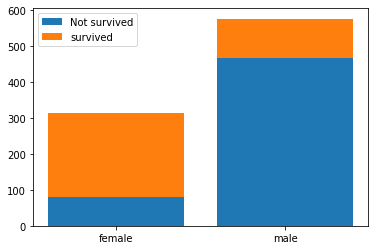

In [32]:
fig, ax = plt.subplots()

ax.bar(df2.index, df2[0], label = 'Not survived')
ax.bar(df2.index, df2[1], bottom = df2[0], label = 'survived')
ax.legend()
plt.show()

In [34]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

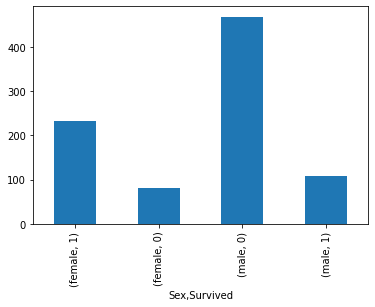

In [35]:
data.groupby('Sex')['Survived'].value_counts().plot(kind = "bar")

In [36]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
data.groupby('Embarked')['Sex', 'Survived', 'Pclass'].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sex,Survived,Pclass
Embarked,,,
C,168,168,168
Q,77,77,77
S,644,644,644


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


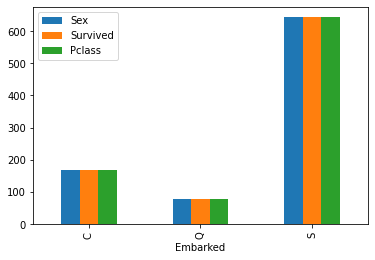

In [54]:
data.groupby('Embarked')['Sex', 'Survived', 'Pclass'].count().plot(kind = "bar")

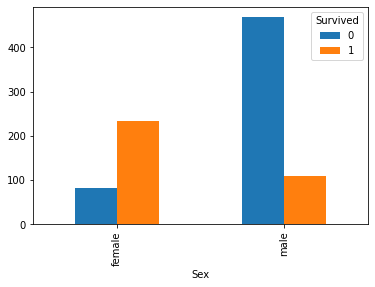

In [55]:
data.groupby('Sex')['Survived'].value_counts().unstack().plot(kind = "bar")

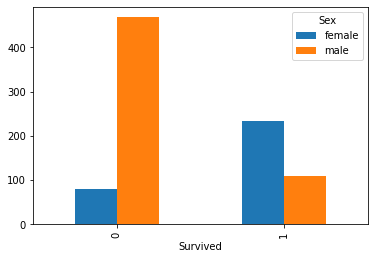

In [56]:
data.groupby('Sex')['Survived'].value_counts().unstack(level = 0).plot(kind = "bar")

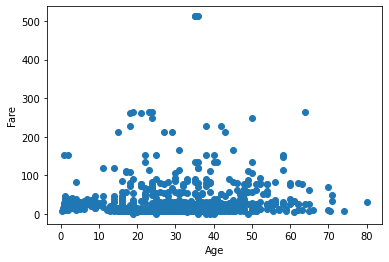

In [58]:
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['Fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()


In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/avs20/SioLabsPython0/main/datasets/winequality-white.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


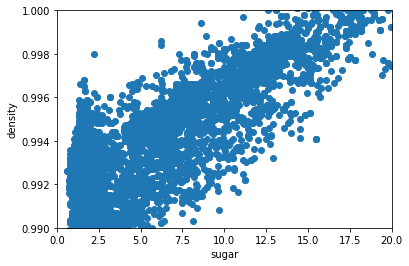

In [65]:
fig, ax = plt.subplots()
ax.scatter(df['residual sugar'], df['density'])
ax.set_xlabel('sugar')
ax.set_ylabel('density')
ax.set_xlim(0,20)
ax.set_ylim(0.99,1)
plt.show()

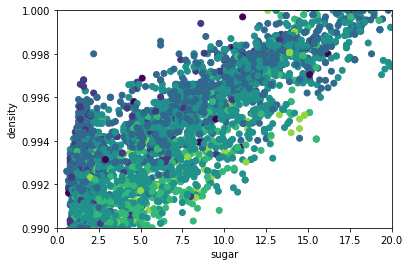

In [66]:
fig, ax = plt.subplots()
ax.scatter(df['residual sugar'], df['density'], c = df['quality'])
ax.set_xlabel('sugar')
ax.set_ylabel('density')
ax.set_xlim(0,20)
ax.set_ylim(0.99,1)
plt.show()

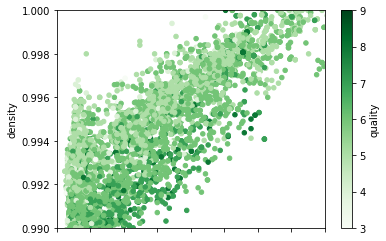

In [74]:
df.plot(kind = 'scatter', x = 'residual sugar', y = 'density', xlim = (0,20), ylim = (0.99,1),colormap = 'Greens', c = 'quality', xlabel = 'Sugar')
plt.show()